<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2023/blob/main/01/PTE_DL1_ALV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 1. gyakorlat: bevezetés, mire leszek képes a félév végére? Ennél jobbra is :-)
### 2023. szeptrember 6.

## Önvezető autó
[forrás](https://github.com/stephencwelch/self_driving_cars)


- Eredetileg az ALV-t az egyetemek "kísérleti járművének" szánták. A szigorú bemutatóprogramok és más tényezők miatt azonban a kutatóknak nehéz volt időt szakítaniuk az ALV-re.
- A CMU 1,2 millió dollárt kért a DARPA-tól két saját jármű építésére, és 1986 elejére megvásárolt és felszerelt egy Chevy furgont, és a Navlab (NAVigation LABratory) nevet adta neki.
- Maximális sebessége 20 mph! A korai demók 10 centiméter/másodperc sebességgel futottak.


![](https://github.com/stephencwelch/self_driving_cars/blob/master/graphics/navlab.png?raw=1)

- A CMU-n számos megközelítést kipróbáltak, beszéljünk egy különösen érdekes megközelítésről, amelyet a végzős hallgató **Dean Pomerleau** alkalmazott.
- Hogy igazán átérezzük a megközelítését, gondoljunk a megoldandó problémára tágabb értelemben.
- Megpróbálunk **kamerával** autót vezetni, és itt van egy diagram az eddig próbált megközelítésről:

![](../graphics/alv_pipeline-01.png)

![](https://github.com/stephencwelch/self_driving_cars/blob/master/graphics/end-to-end-math-problem-01.png?raw=1)

- Rengeteg módja van annak, hogy a vezetési problémát különálló blokkokra bontva megoldásokat tervezzünk, de általánosságban elmondható, hogy ha az autónk kormányozni akar (vagy teljesen önmagát vezetni), akkor meg kell oldanunk ezt a problémát:

- Ha kamerás autót akarsz vezetni, akkor meg kell találnod a választ erre a matematikai feladatra.
- A látásalapú autonóm vezetés egyik módja a leképezés egy nagyon magas dimenziójú térből (egy vagy több kép) egy nagyon alacsony dimenziójú térbe (csak a kormányszög, vagy az oldalirányú és hosszirányú vezérlés esetén a kormányszög és a sebesség).
- De hogyan is oldjunk meg egy ilyen matematikai problémát? Az ALV tanulmányozásával találtunk egy szuboptimális megoldást, hogyan máshogy közelíthetnénk meg ezt a problémát?
- Íme egy tipp: amikor Pomerleau dékán 1987-ben megjelent a CMU-n a doktori iskolában, egy Geoff Hinton nevű docens épp akkoriban publikált egy jelentést "Experiments on Learning by Back Propagation" címmel.
- Ez érdekes útra vezette Pomerleau-t:

# Mi lenne, ha egy neurális hálózatot használnánk, hogy megtanuljuk az egészet?

- Lehetséges-e betanítani egy neurális hálózatot arra, hogy megtanulja **az összes matematikát** egy autó irányításához?
    - Amikor 2016 júniusában elkezdtem az autonóm vezetéssel foglalkozni, pontosan erről beszélgettem egy régi barátommal és munkatársammal, és azzal érveltem, hogy ez talán nem is lehetséges. Lássuk, hogy igazam volt-e...

# Megtaníthatunk egy neurális hálózatot vezetni?

![](https://github.com/stephencwelch/self_driving_cars/blob/master/videos/images_and_angle_wheego.gif?raw=1)

- Vagy legalábbis kormányozni?
- Megismerhetjük ennek a leképezésnek (vagy egy változatának) a matematikáját?
- Ennek a problémának az előremutató iránya ésszerű, de egy neurális hálózat betanításához meg kell találnunk a **inverz** probléma közelítő megoldását!
    - Vajon a kormánykerék szöge önmagában elegendő információt szolgáltat ahhoz, hogy megtanítsuk egy tanuló algoritmusnak, hogyan értelmezze az útról készült képeket??

- Here's Pomerleau's original NIPS paper: **ALVINN: An Autonomous Land Vehicle In a Neural Network**

- Íme a Dean Pomerleau által használt neurális hálózat architektúrája.
- Pomerleau (legalábbis kezdetben) csak a kék képcsatornát használta, és a képeket csak (30x32) pixelre mintavételezte.
- Az ALVINN kimenete okosan van beállítva - a kormányzási szögeket 30 diszkrét tárolórekeszbe csoportosítják, és a képzési adatokat guasian eloszlásként állítják be az aktuális kormányzási szögnek megfelelő tárolórekesz körül - ez lineárisabbá teszi a problémát - a bemeneti képek kis változásai megfelelnek a kimeneti értékek kis változásainak.

![](https://github.com/stephencwelch/self_driving_cars/blob/master/graphics/question-two-01.png?raw=1)

![](../graphics/spacer_small-01.png)

In [ ]:
30*32*4+30*4 #Plus bias units - but let's be honest, who really cares about counting those?

3960

- ~4k paraméterek
    - Ez vagy sok, vagy semmi, attól függően, hogy milyen szemszögből nézzük a dolgot.
    - A VGG-16, egy modern népszerű mély neurális hálózat 138M paraméterrel rendelkezik!
- Nos, ha képeket akarunk megtanulni a képekről a kormánykerék szögére való leképezéshez (ami remélhetőleg autót fog vezetni!), akkor szükségünk van néhány adatra.
    - Pomerleau ötletében az egyik nagyon klassz dolog az, hogy az adatok gyűjtése egyszerű!
    - Csak tegyünk egy kamerát és egy kormányszög-érzékelőt egy autóra, és rögzítsük, hogyan vezet egy ember!
        - Ezt a technikát **viselkedésklónozásnak** nevezik, és ez egy elképesztően egyszerű módja annak, hogy sok-sok adatot gyűjtsünk.

#Adatok betöltése

In [ ]:
import h5py as h5 # A HDF5 fájl kétféle objektum tárolója: adatkészletek, amelyek tömbszerű adatgyűjtemények,
#és csoportok, amelyek mappaszerű tárolók, amelyek adatkészleteket és más csoportokat tartalmaznak.
%pylab inline
# Amikor a %pylab függvényt beírjuk az IPython parancssorba, az a Matplotlib különböző moduljainak importálását indítja el.
!wget https://github.com/karsarobert/Deep-Learning-2023/raw/main/track_data_2.h5

data = h5.File('track_data_2.h5', 'r') #adatok importálása


Populating the interactive namespace from numpy and matplotlib
--2023-09-04 17:57:58--  https://github.com/karsarobert/Deep-Learning-2023/raw/main/track_data_2.h5
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/karsarobert/Deep-Learning-2023/main/track_data_2.h5 [following]
--2023-09-04 17:57:58--  https://raw.githubusercontent.com/karsarobert/Deep-Learning-2023/main/track_data_2.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8210048 (7.8M) [application/octet-stream]
Saving to: ‘track_data_2.h5’

track_data_2.h5     100%[===================>]   7.83M  --.-KB/s    in 0.1s    

2023-09-04 17:5

In [ ]:
data['images']

<HDF5 dataset "images": shape (2000, 60, 64), type "|u1">

#Adatok megtekintése

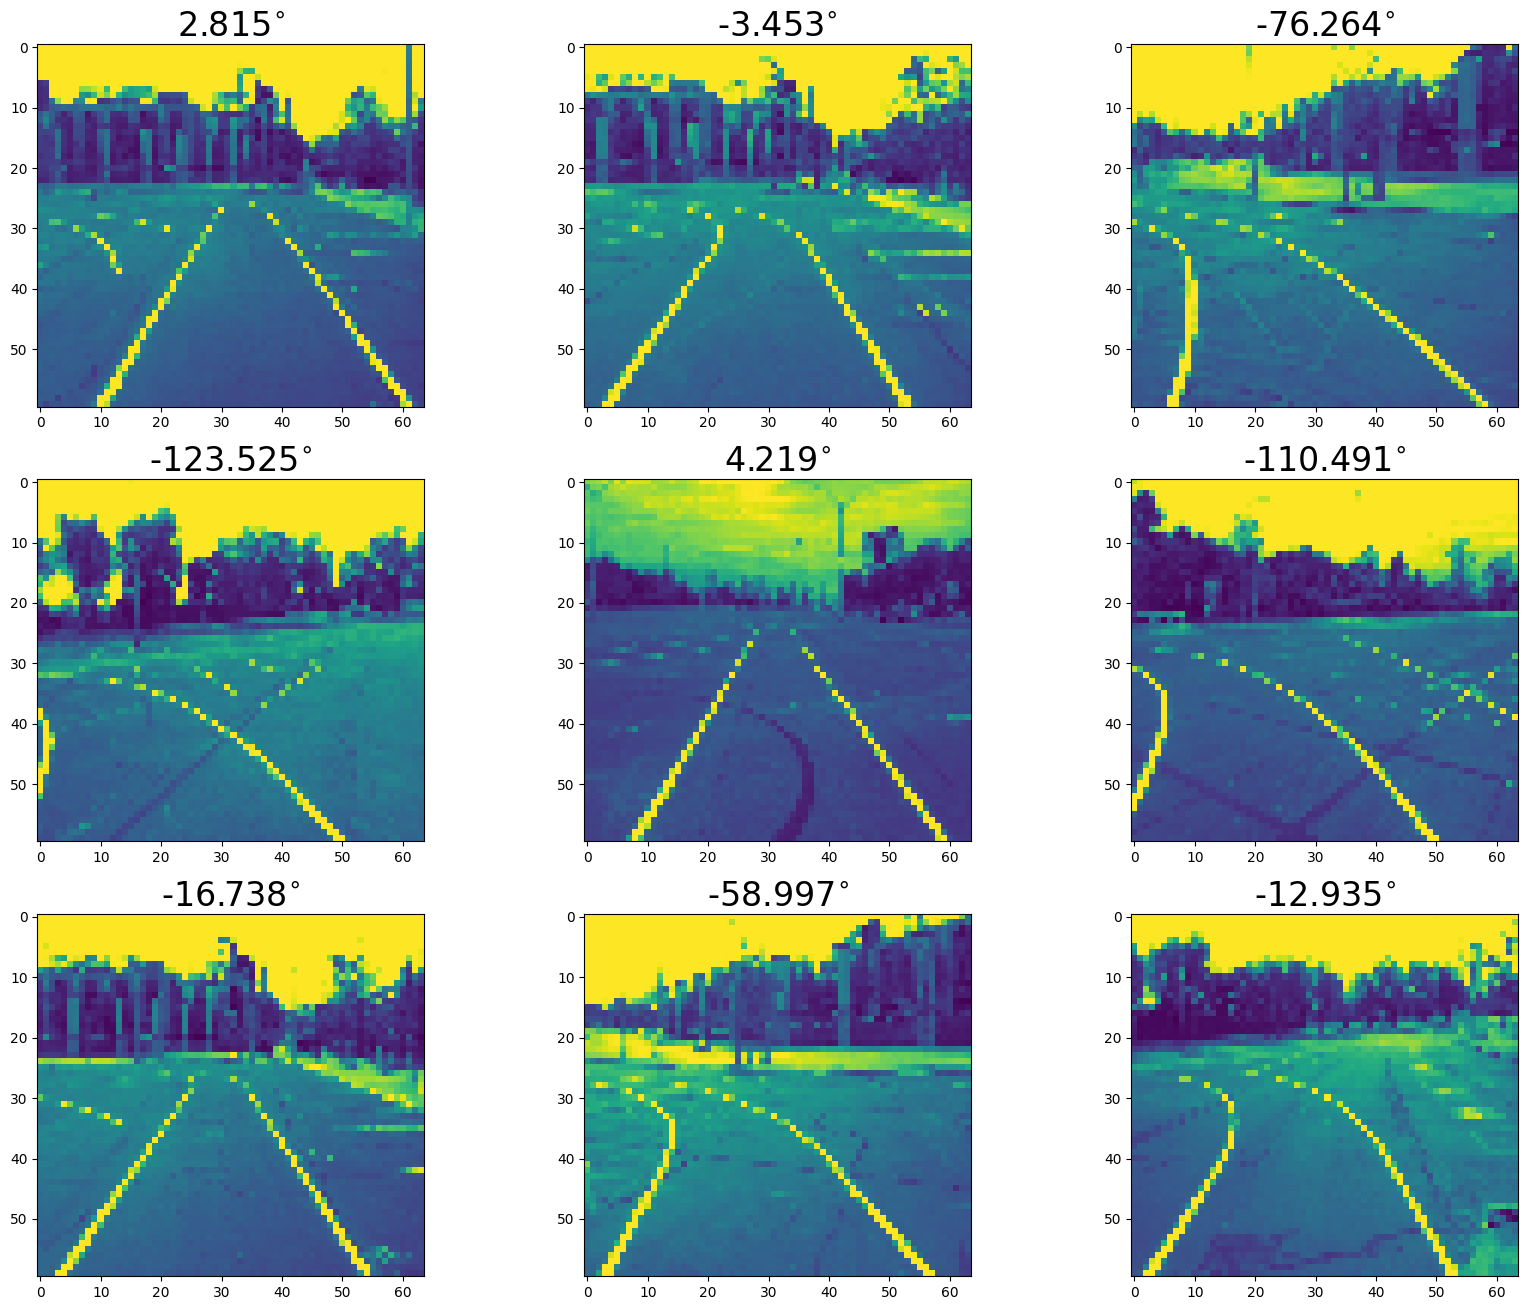

In [ ]:
fig = figure(0, (20, 16))
for i in range(9):
    fig.add_subplot(3, 3, i+1)
    imshow(data['images'][i*100, :, :]); grid(0)
    title(str(round(data['angles'][i*100], 3)) + '$^{\circ}$', fontsize = 24)

##Adatok felosztása tréning és teszt halmazokra

In [ ]:
training_indices = np.arange(1500)
testing_indices = np.arange(1500, 2000)

images_training = data['images'][training_indices, :, :]/255. #Normalize between 0 and 1

y_train = data['angles'][training_indices]

images_testing = data['images'][testing_indices, :, :]/255. #Normalize between 0 and 1

y_test = data['angles'][testing_indices]

##Adatok átalakítása, kilapítása

In [ ]:
X_train = images_training.reshape(1500,-1)
X_test = images_testing.reshape(500,-1)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


##A modell felépítése

In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(5, activation='relu', kernel_initializer='glorot_normal', input_shape=(n_features,)))
model.add(Dense(3, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(1))



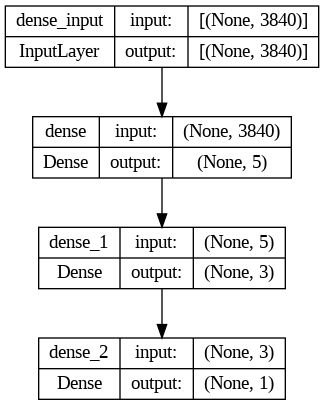

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 19205     
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19,227
Trainable params: 19,227
Non-trainable params: 0
_________________________________________________________________


## A modell illesztése

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(X_test, y_test))

z = model.predict(X_test)

Epoch 1/150
47/47 [==============================] - 1s 7ms/step - loss: 3968.6699 - val_loss: 2649.8960
Epoch 2/150
47/47 [==============================] - 0s 4ms/step - loss: 2696.9324 - val_loss: 2519.2908
Epoch 3/150
47/47 [==============================] - 0s 4ms/step - loss: 2521.0303 - val_loss: 2334.5701
Epoch 4/150
47/47 [==============================] - 0s 5ms/step - loss: 2333.9446 - val_loss: 2138.3689
Epoch 5/150
47/47 [==============================] - 0s 3ms/step - loss: 2127.1953 - val_loss: 1969.1205
Epoch 6/150
47/47 [==============================] - 0s 4ms/step - loss: 1889.3982 - val_loss: 1759.8168
Epoch 7/150
47/47 [==============================] - 0s 3ms/step - loss: 1620.7710 - val_loss: 1513.4143
Epoch 8/150
47/47 [==============================] - 0s 4ms/step - loss: 1338.4899 - val_loss: 1308.8435
Epoch 9/150
47/47 [==============================] - 0s 4ms/step - loss: 1056.8683 - val_loss: 1027.0991
Epoch 10/150
47/47 [==============================] - 0

##A veszteség, költségfüggvény alakulása


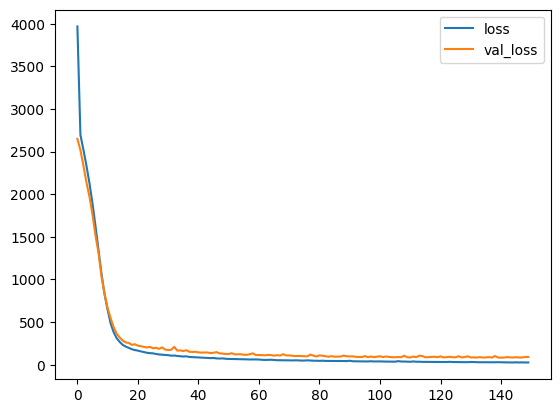

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot();

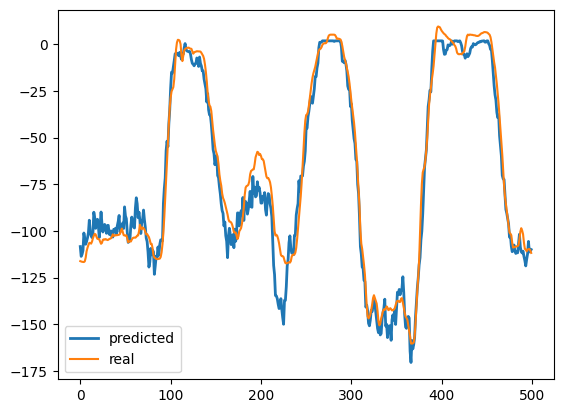

In [ ]:
plot(z, linewidth = 2)
plot(y_test)
legend(['predicted', 'real'])

<ipython-input-33-503a78180a70>:6: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(26)
<ipython-input-33-503a78180a70>:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(26)


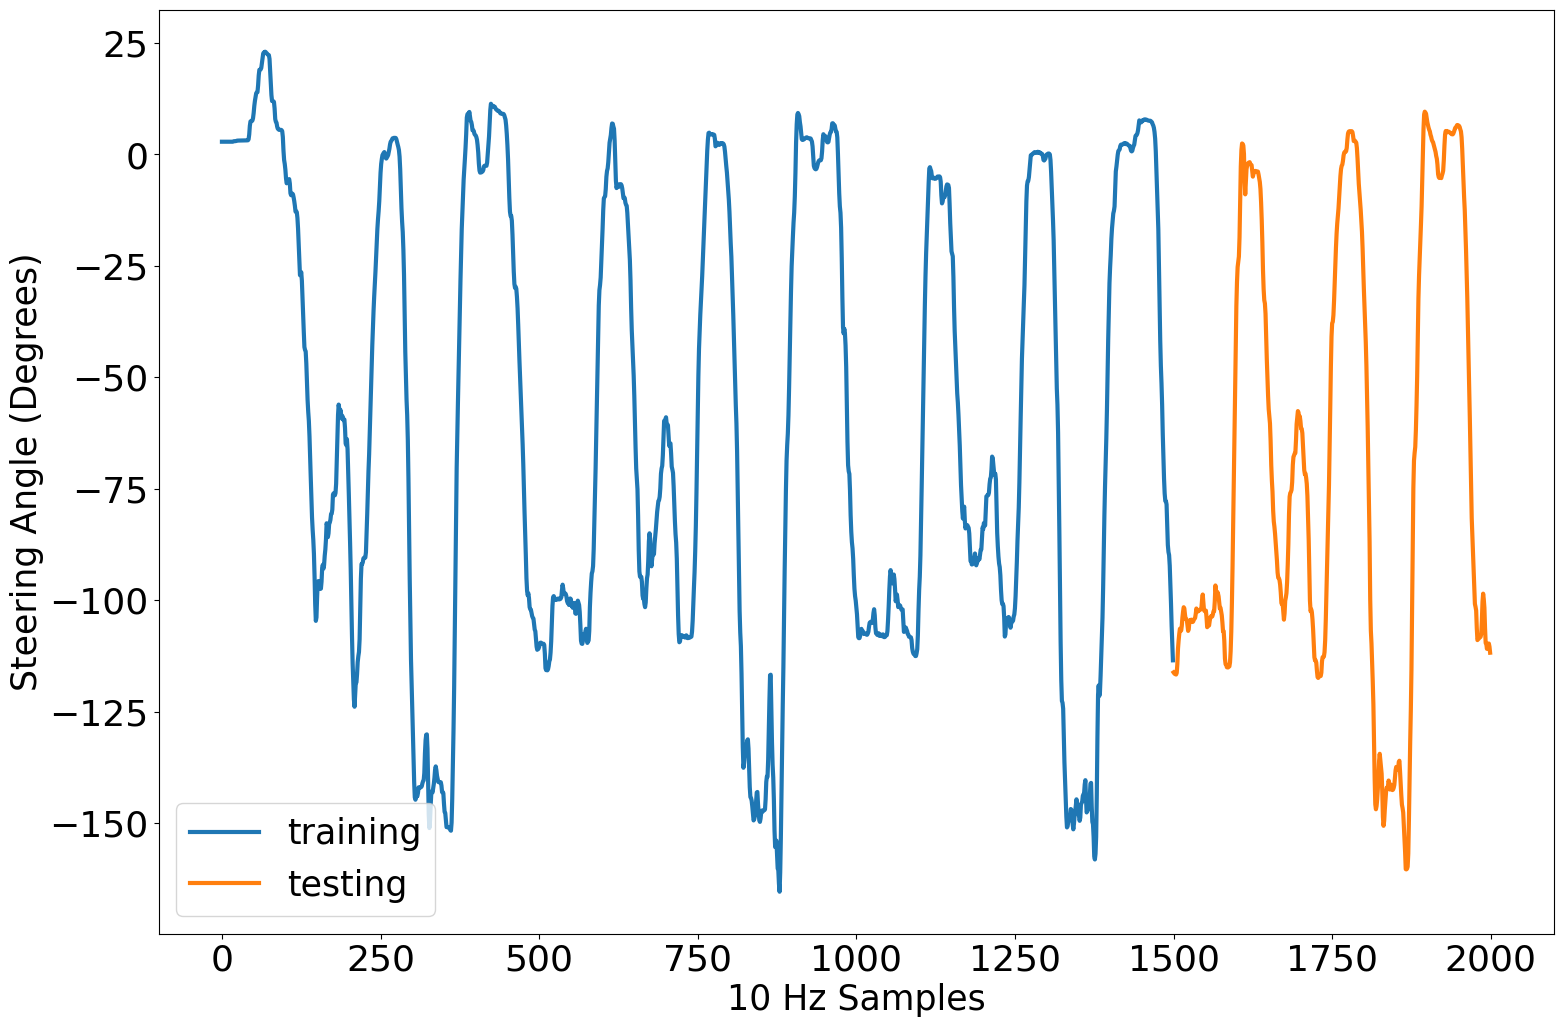

In [ ]:
fig = figure(0, (18, 12))
plot(training_indices, data['angles'][:][training_indices], linewidth = 3)
plot(testing_indices, data['angles'][:][testing_indices], linewidth = 3)
ylabel('Steering Angle (Degrees)', fontsize = 25); xlabel('10 Hz Samples', fontsize = 25)
for tick in gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(26)
for tick in gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(26)
legend(['training', 'testing'], fontsize = 25)

# Ugyanez a probléma Random Forest Regressor segítségével

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 8, random_state=1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

8.022789412434545

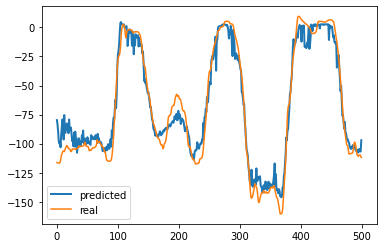

In [ ]:
plot(y_pred, linewidth = 2)
plot(y_test)
legend(['predicted', 'real'])

In [ ]:
import time
print(time.ctime())

Tue Sep  6 18:11:14 2022
